In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [6]:
# Load the dataset
leads_df = pd.read_csv('/Leads.csv')

In [7]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Step 1: Handle missing values
# Drop columns with a significant number of missing values or that are not relevant
leads_df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [9]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [10]:
# Replace 'Select' in categorical variables as it's considered missing data
leads_df.replace('Select', pd.NA, inplace=True)

In [11]:
# Drop rows with missing values for simplicity
leads_df.dropna(inplace=True)

In [12]:
# Step 2: Convert categorical variables into numerical
leads_df = pd.get_dummies(leads_df, drop_first=True)

In [18]:
# Step 3: Split the data into features and target variable
X = leads_df.drop('Converted', axis=1)
y = leads_df['Converted']
y

,Converted
6,1
22,1
27,1
37,1
39,1
...,...
9210,1
9211,1
9222,0
9227,1


In [40]:
#'Converted' is the target variable.

# Refit the model with proper feature names if needed:
X = leads_df.drop('Converted', axis=1)
y = leads_df['Converted']

# Split the data (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Fit the model (if not already fitted)
model = LogisticRegression()
model.fit(X_train, y_train)

# Now, retrieve the feature names and the coefficients
coefficients = pd.DataFrame({
    'Variable': X_train.columns,  # Using the column names of X_train
    'Coefficient': model.coef_[0]  # Coefficients from the fitted model
})

# Sort the coefficients based on their absolute values
top_variables = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index).head(3)

# Display the top 3 variables contributing to lead conversion
print("Top 3 variables contributing to lead conversion:")
print(top_variables)


Top 3 variables contributing to lead conversion:
                                    Variable  Coefficient
62  Tags_Will revert after reading the email     2.421309
73               Lead Profile_Potential Lead     1.489551
70                        Lead Quality_Worst    -1.303787


In [14]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [15]:
# Step 5: Standardize the data (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(208, 92)
(90, 92)
(208,)
(90,)


In [20]:
### 2. **Build the Logistic Regression Model**


# Step 6: Build the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [32]:
logreg

LogisticRegression()

In [21]:
# Step 7: Make predictions
y_pred = logreg.predict(X_test)

# Step 8: Assign lead scores (probability of conversion)
lead_scores = logreg.predict_proba(X_test)[:, 1] * 100  # Scale to 0-100

In [23]:
### 3. **Evaluate the Model**


# Step 9: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

In [24]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.94
Confusion Matrix:
[[24  3]
 [ 2 61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.95      0.97      0.96        63

    accuracy                           0.94        90
   macro avg       0.94      0.93      0.93        90
weighted avg       0.94      0.94      0.94        90

ROC-AUC Score: 0.98


In [26]:
### 4. **Visualize Results** (Optional but useful)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

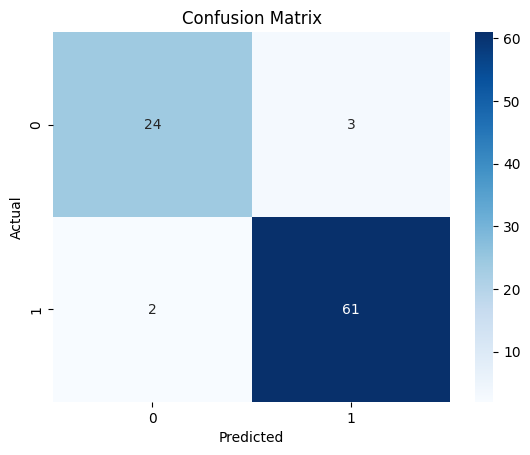

In [27]:
# Step 10: Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Step 11: Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

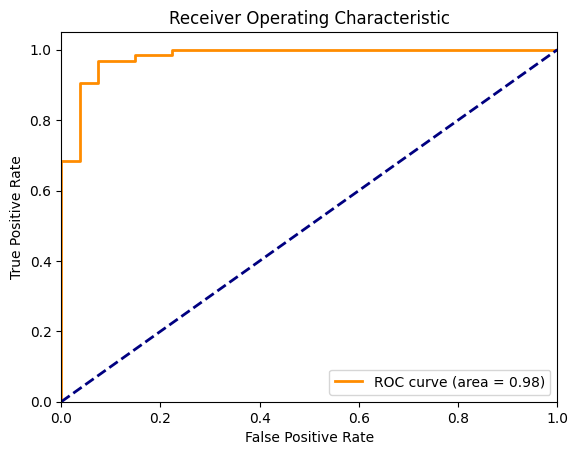

In [29]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [41]:
#Top 3 Categorical/Dummy Variables to Focus On:

# Filter out the categorical variables from the coefficient list
categorical_variables = coefficients[coefficients['Variable'].str.contains('_')]
top_categorical_variables = categorical_variables.reindex(
    categorical_variables.Coefficient.abs().sort_values(ascending=False).index
).head(3)

print(top_categorical_variables)

                                    Variable  Coefficient
62  Tags_Will revert after reading the email     2.421309
73               Lead Profile_Potential Lead     1.489551
70                        Lead Quality_Worst    -1.303787


In [42]:
# Sorting the coefficients based on their absolute values to find top contributing variables
top_variables = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index).head(3)
print(top_variables)

                                    Variable  Coefficient
62  Tags_Will revert after reading the email     2.421309
73               Lead Profile_Potential Lead     1.489551
70                        Lead Quality_Worst    -1.303787


In [43]:
# Filter for dummy variables (exclude original numerical features)
dummy_coefficients = coefficients[coefficients['Variable'].str.contains('_')]

# Find top 3 dummy variables
top_dummy_variables = dummy_coefficients.reindex(dummy_coefficients.Coefficient.abs().sort_values(ascending=False).index).head(3)

# Display the results
print("Top 3 categorical/dummy variables contributing to lead conversion:")
print(top_dummy_variables)

Top 3 categorical/dummy variables contributing to lead conversion:
                                    Variable  Coefficient
62  Tags_Will revert after reading the email     2.421309
73               Lead Profile_Potential Lead     1.489551
70                        Lead Quality_Worst    -1.303787
